In [3]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
import matplotlib.ticker as ticker

In [6]:
protein_csv = "../gtdb95-evolpaths.pathcompare.protein-input.csv.gz"
dna_csv = "../gtdb95-evolpaths.pathcompare.dna-input.csv.gz"

fastani_csv = "../gtdb95-evolpaths.path-fastani.csv.gz"
comparem_csv = "../gtdb95-evolpaths.path-compareM.csv.gz"

In [ ]:
# replace zeroes with np.nan
cols = ["jaccard", "anchor_containment", "max_containment"]

In [80]:
protDF = pd.read_csv(protein_csv, sep=",")
protDF[cols] = protDF[cols].replace({0:np.nan})
protDF

,comparison_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,protein,7,100,0.261496,0.613636,0.613636,5236,10264,3213,protein-7
1,GCA_004524385.1_x_GCA_004375715.1,path1,family,protein,7,100,0.026196,0.068182,0.068182,5236,8749,357,protein-7
2,GCA_004524385.1_x_GCA_004524545.1,path1,order,protein,7,100,0.007171,0.017189,0.017189,5236,7404,90,protein-7
3,GCA_004524385.1_x_GCA_005191425.1,path1,class,protein,7,100,0.007075,0.019672,0.019672,5236,9426,103,protein-7
4,GCA_004524385.1_x_GCA_001940645.1,path1,phylum,protein,7,100,0.003614,0.013369,0.013369,5236,14203,70,protein-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177415,GCA_004376785.1_x_GCA_001303785.1,path2957,family,hp,35,100,0.029491,0.066934,0.066934,5229,6989,350,hp-35
177416,GCA_004376785.1_x_GCA_003645615.1,path2957,order,hp,35,100,0.005846,0.012813,0.012813,5229,6299,67,hp-35
177417,GCA_004376785.1_x_GCA_002347155.1,path2957,class,hp,35,100,0.001075,0.003060,0.003060,5229,9667,16,hp-35
177418,GCA_004376785.1_x_GCA_002774315.1,path2957,phylum,hp,35,100,0.001791,0.004747,0.002869,5229,3160,15,hp-35


In [35]:
dnaDF = pd.read_csv(dna_csv, sep=",")
dnaDF[cols] = dnaDF[cols].replace({0:np.nan})
dnaDF

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_004524535.1 s__SDNM01 sp004524535,path1,genus,DNA,21,100,0.160974,0.412247,0.412247,1829,3609,754,DNA-21
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_004375715.1 s__SOKP01 sp004375715,path1,family,DNA,21,100,0.000201,0.000547,0.000547,1829,3157,1,DNA-21
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_004524545.1 s__AMARA-1 sp004524545,path1,order,DNA,21,100,NaN,NaN,NaN,1829,2542,0,DNA-21
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_005191425.1 s__HEL-GB-B sp005191425,path1,class,DNA,21,100,0.000373,0.001093,0.001093,1829,3542,2,DNA-21
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_001940645.1 s__LC-3 sp001940645,path1,phylum,DNA,21,100,NaN,NaN,NaN,1829,5537,0,DNA-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230641,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1 s__DG-78 sp004376785,GCA_001303785.1 s__SM23-42 sp001303785,path2957,family,hp,35,100,0.004162,0.009712,0.009712,37686,50621,366,hp-35
230642,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1 s__DG-78 sp004376785,GCA_003645615.1 s__B36-G15 sp003645615,path2957,order,hp,35,100,0.000820,0.001778,0.001778,37686,44125,67,hp-35
230643,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1 s__DG-78 sp004376785,GCA_002347155.1 s__UBA2258 sp002347155,path2957,class,hp,35,100,0.000151,0.000451,0.000451,37686,75026,17,hp-35
230644,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1 s__DG-78 sp004376785,GCA_002774315.1 s__UBA3073 sp002774315,path2957,phylum,hp,35,100,0.000235,0.000575,0.000398,37686,26095,15,hp-35


In [22]:
def similarity_to_evoldist(similarity, ksize, b1=1.0, b2=1.0, return_ANI=False):
    # orig used with jaccard; trying with jaccard, max containment, anchor containment
    # proportion of observed differences
    if similarity == 0:
        return np.nan # 1.0
    p = 1 - np.power(2*similarity/(similarity + 1),(1/float(ksize)))
    # corrected evolutionary distance
    d = -(b1*np.log((1-p)/b2))
    if return_ANI:
        return 1-d
    return d

def calculate_ANI_AAI(row):
    name = "ANI-AAI"
    if row["alphabet"] in ["protein", "dayhoff", "hp"]:
        name = "ANI-AAI"
    j_name = f"jaccard_{name}"
    mc_name = f"mc_{name}"
    ac_name = f"ac_{name}"
    row[j_name] = similarity_to_evoldist(row["jaccard"], row["ksize"], return_ANI=True)
    row[mc_name] = similarity_to_evoldist(row["max_containment"], row["ksize"], return_ANI=True)
    row[ac_name] = similarity_to_evoldist(row["anchor_containment"], row["ksize"], return_ANI=True)
    return row

In [81]:
protDF = protDF.apply(calculate_ANI_AAI, axis=1)
protDF

,comparison_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,protein,7,100,0.261496,0.613636,0.613636,5236,10264,3213,protein-7,0.874216,0.960901,0.960901
1,GCA_004524385.1_x_GCA_004375715.1,path1,family,protein,7,100,0.026196,0.068182,0.068182,5236,8749,357,protein-7,0.575020,0.705945,0.705945
2,GCA_004524385.1_x_GCA_004524545.1,path1,order,protein,7,100,0.007171,0.017189,0.017189,5236,7404,90,protein-7,0.392619,0.516086,0.516086
3,GCA_004524385.1_x_GCA_005191425.1,path1,class,protein,7,100,0.007075,0.019672,0.019672,5236,9426,103,protein-7,0.390695,0.535012,0.535012
4,GCA_004524385.1_x_GCA_001940645.1,path1,phylum,protein,7,100,0.003614,0.013369,0.013369,5236,14203,70,protein-7,0.295229,0.480721,0.480721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177415,GCA_004376785.1_x_GCA_001303785.1,path2957,family,hp,35,100,0.029491,0.066934,0.066934,5229,6989,350,hp-35,0.918298,0.940695,0.940695
177416,GCA_004376785.1_x_GCA_003645615.1,path2957,order,hp,35,100,0.005846,0.012813,0.012813,5229,6299,67,hp-35,0.872723,0.894947,0.894947
177417,GCA_004376785.1_x_GCA_002347155.1,path2957,class,hp,35,100,0.001075,0.003060,0.003060,5229,9667,16,hp-35,0.824483,0.854306,0.854306
177418,GCA_004376785.1_x_GCA_002774315.1,path2957,phylum,hp,35,100,0.001791,0.004747,0.002869,5229,3160,15,hp-35,0.839043,0.866804,0.852467


In [36]:
dnaDF = dnaDF.apply(calculate_ANI_AAI, axis=1)
dnaDF

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_004524535.1 s__SDNM01 sp004524535,path1,genus,DNA,21,100,0.160974,0.412247,0.412247,1829,3609,754,DNA-21,0.938923,0.974373,0.974373
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_004375715.1 s__SOKP01 sp004375715,path1,family,DNA,21,100,0.000201,0.000547,0.000547,1829,3157,1,DNA-21,0.627560,0.675289,0.675289
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_004524545.1 s__AMARA-1 sp004524545,path1,order,DNA,21,100,NaN,NaN,NaN,1829,2542,0,DNA-21,NaN,NaN,NaN
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_005191425.1 s__HEL-GB-B sp005191425,path1,class,DNA,21,100,0.000373,0.001093,0.001093,1829,3542,2,DNA-21,0.657025,0.708270,0.708270
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1 s__SDNM01 sp004524385,GCA_001940645.1 s__LC-3 sp001940645,path1,phylum,DNA,21,100,NaN,NaN,NaN,1829,5537,0,DNA-21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230641,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1 s__DG-78 sp004376785,GCA_001303785.1 s__SM23-42 sp001303785,path2957,family,hp,35,100,0.004162,0.009712,0.009712,37686,50621,366,hp-35,0.863063,0.887116,0.887116
230642,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1 s__DG-78 sp004376785,GCA_003645615.1 s__B36-G15 sp003645615,path2957,order,hp,35,100,0.000820,0.001778,0.001778,37686,44125,67,hp-35,0.816734,0.838829,0.838829
230643,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1 s__DG-78 sp004376785,GCA_002347155.1 s__UBA2258 sp002347155,path2957,class,hp,35,100,0.000151,0.000451,0.000451,37686,75026,17,hp-35,0.768393,0.799682,0.799682
230644,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1 s__DG-78 sp004376785,GCA_002774315.1 s__UBA3073 sp002774315,path2957,phylum,hp,35,100,0.000235,0.000575,0.000398,37686,26095,15,hp-35,0.781085,0.806604,0.796107


In [107]:
cmDF = pd.read_csv(comparem_csv, sep=",")
cm_cols = ["mean_aai", "std_aai", "genes_in_anchor", "genes_in_ref", "orthologous_genes", "orthologous_fraction"]
cmDF[cm_cols] = cmDF[cm_cols].replace({0:np.nan})
min(cmDF["mean_aai"])

37.01

In [104]:
cmDF

,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction
0,92.35,9.64,1979.0,3607.0,1402.0,70.84
1,61.31,13.20,1979.0,3063.0,860.0,43.46
2,45.84,10.35,1979.0,2496.0,513.0,25.92
3,44.30,9.48,1979.0,3286.0,532.0,26.88
4,45.84,10.35,1979.0,2496.0,513.0,25.92
...,...,...,...,...,...,...
23651,53.84,13.01,4110.0,2564.0,1211.0,47.23
23652,60.57,14.34,4110.0,3718.0,1842.0,49.54
23653,53.84,13.01,4110.0,2564.0,1211.0,47.23
23654,49.53,11.64,4110.0,2620.0,1094.0,41.76


In [16]:
faDF = pd.read_csv(fastani_csv, sep=",")
faDF

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,94.634,427.0,487.0
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,NaN,NaN,NaN
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,NaN,NaN,NaN
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,NaN,NaN,NaN
4,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
23651,GCF_000426865.1_x_GCA_007125165.1,GCF_000426865.1,GCA_007125165.1,path999,class,NaN,NaN,NaN
23652,GCF_000426865.1_x_GCF_000020385.1,GCF_000426865.1,GCF_000020385.1,path999,order,NaN,NaN,NaN
23653,GCF_000426865.1_x_GCA_007125165.1,GCF_000426865.1,GCA_007125165.1,path999,class,NaN,NaN,NaN
23654,GCF_000426865.1_x_GCA_001873935.1,GCF_000426865.1,GCA_001873935.1,path999,phylum,NaN,NaN,NaN


In [ ]:
protDF.groupby("lowest_common_rank")["mean_aai"].describe()

In [25]:
# colors, etc
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]
reverse_rankorder = rankorder[::-1]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
dna_order=["DNA-21","DNA-31", "DNA-51"]
protein_order = ["protein-7", "protein-9", "protein-10", "protein-11"]
dayhoff_order = ["dayhoff-15", "dayhoff-17", "dayhoff-19"]
hp_order = ["hp-30", "hp-33", "hp-35"]

all_protein_order = protein_order + dayhoff_order + hp_order
alphak_order = nucl_order + protein_order + dayhoff_order + hp_order

alphabet_colors = {"nucleotide":"#b2182b", "protein": "#2166ac", "dayhoff": "#4393c3", "hp": "#92c5de"}
alphabet_order = ["nucleotide", "protein", "dayhoff", "hp"]
protnucl_colors = {"nucleotide":"#b2182b", "protein": "#2166ac"}
protnucl_order = ["nucleotide", "protein"]

pnlong_colors = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-10": "#2166ac"}
pnlong_colors2 = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-7": "#2166ac"}
pd_colors = {"DNA-21":"#b2182b","DNA-31":"#d6604d","DNA-51":"#f4a582", "protein-10": "#2166ac"}

alphak_colors = {}
nucl_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582"}
protein_colors = {"protein-7": "#a1d99b", "protein-9": "#74c476", "protein-10": "#31a354", "protein-11": "#006d2c"} 
dayhoff_colors = {"dayhoff-15": "#9e9ac8", "dayhoff-17": "#756bb1", "dayhoff-19": "#54278f"}
hp_colors = {"hp-30": "#6baed6", "hp-33": "#3182bd", "hp-35": "#08519c"}

alphak_colors = nucl_colors
alphak_colors.update(protein_colors)
alphak_colors.update(dayhoff_colors)
alphak_colors.update(hp_colors)

rankcolors = {"superkingdom": "#ffc000", "phylum": "#00b300", "class": "#329932", "order": "#2b9d91", "family": "#1c8cc3", "genus": "#074191"}

In [37]:
dna_only = dnaDF[dnaDF["alpha-ksize"].isin(dna_order)]

In [83]:
p10 = protDF[protDF["alpha-ksize"] == "protein-10"]
protNucl = pd.concat([dna_only, p10])

In [20]:
cmDF.groupby("lowest_common_rank")["mean_aai"].describe()

,count,mean,std,min,25%,50%,75%,max
lowest_common_rank,,,,,,,,
class,5914.0,47.921515,4.873685,0.0,46.49,48.36,50.48,59.17
family,2957.0,59.603504,7.485847,0.0,55.65,59.40,63.63,84.51
genus,2957.0,76.691515,11.465820,0.0,69.72,76.12,84.29,99.37
order,5914.0,52.113771,5.277527,0.0,50.24,51.96,54.58,63.29
phylum,2957.0,44.813203,4.203424,0.0,43.79,44.75,45.90,55.31
superkingdom,2957.0,41.599929,3.475024,0.0,41.33,41.92,42.51,44.61


In [29]:
p10.groupby("lowest_common_rank")["mc_ANI-AAI"].describe()

,count,mean,std,min,25%,50%,75%,max
lowest_common_rank,,,,,,,,
class,2957.0,0.591133,0.052912,0.302459,0.560203,0.591959,0.629288,0.734173
family,2957.0,0.745427,0.057123,0.302459,0.706303,0.746959,0.784743,0.921277
genus,2957.0,0.877648,0.059085,0.667212,0.836415,0.878631,0.923005,0.988708
order,2957.0,0.656743,0.050442,0.326749,0.625090,0.661603,0.687886,0.818002
phylum,2956.0,0.532296,0.055781,0.283335,0.500943,0.537841,0.566143,0.704168
superkingdom,2953.0,0.447178,0.036607,0.216087,0.430291,0.450416,0.468572,0.579200


In [44]:
p10.groupby("lowest_common_rank")["jaccard_ANI-AAI"].describe()

,count,mean,std,min,25%,50%,75%,max
lowest_common_rank,,,,,,,,
class,2957.0,0.489005,0.061600,0.068121,0.458234,0.498959,0.534428,0.646349
family,2957.0,0.664270,0.063445,0.201741,0.620330,0.666521,0.706608,0.868522
genus,2957.0,0.818802,0.073327,0.564130,0.765201,0.816064,0.873897,0.976269
order,2957.0,0.563322,0.051638,0.252821,0.529760,0.564736,0.599913,0.746103
phylum,2956.0,0.436610,0.059289,0.136245,0.399614,0.440798,0.472578,0.620180
superkingdom,2953.0,0.341834,0.043961,0.093007,0.325471,0.349451,0.368603,0.458318


In [18]:
faDF.groupby("lowest_common_rank")["fastani_ident"].describe()

,count,mean,std,min,25%,50%,75%,max
lowest_common_rank,,,,,,,,
class,142.0,76.248296,0.341534,75.3277,76.043650,76.2791,76.502075,76.9201
family,540.0,78.252356,1.209404,75.6251,77.480775,78.0287,78.689000,85.9324
genus,2250.0,82.867456,5.048807,76.2056,78.991675,81.1279,85.602525,99.8326
order,276.0,77.073519,0.665051,75.0543,76.728700,77.0776,77.442500,79.2195
phylum,2.0,74.991000,0.247063,74.8163,74.903650,74.9910,75.078350,75.1657
superkingdom,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#d21 = dnaDF[dnaDF["ksize"] == 21]
dnaDF[dnaDF["ksize"] == 21].groupby("lowest_common_rank")["mc_ANI-AAI"].describe()

#d21

,count,mean,std,min,25%,50%,75%,max
lowest_common_rank,,,,,,,,
class,483.0,0.783613,0.024636,0.743407,0.766206,0.775178,0.805423,0.894029
family,1851.0,0.797761,0.028547,0.735074,0.777113,0.795758,0.816372,0.914223
genus,2749.0,0.865985,0.054345,0.749779,0.825297,0.861728,0.904774,0.993414
order,879.0,0.779827,0.021487,0.742076,0.762373,0.778019,0.794354,0.916703
phylum,150.0,0.775388,0.024188,0.719055,0.757327,0.774896,0.779520,0.880929
superkingdom,44.0,0.762443,0.012601,0.750154,0.751126,0.759214,0.767414,0.796119


In [42]:
dnaDF[dnaDF["ksize"] == 31].groupby("lowest_common_rank")["mc_ANI-AAI"].describe()

,count,mean,std,min,25%,50%,75%,max
lowest_common_rank,,,,,,,,
class,483.0,0.783613,0.024636,0.743407,0.766206,0.775178,0.805423,0.894029
family,1851.0,0.797761,0.028547,0.735074,0.777113,0.795758,0.816372,0.914223
genus,2749.0,0.865985,0.054345,0.749779,0.825297,0.861728,0.904774,0.993414
order,879.0,0.779827,0.021487,0.742076,0.762373,0.778019,0.794354,0.916703
phylum,150.0,0.775388,0.024188,0.719055,0.757327,0.774896,0.779520,0.880929
superkingdom,44.0,0.762443,0.012601,0.750154,0.751126,0.759214,0.767414,0.796119


In [43]:
dnaDF[dnaDF["ksize"] == 51].groupby("lowest_common_rank")["mc_ANI-AAI"].describe()

,count,mean,std,min,25%,50%,75%,max
lowest_common_rank,,,,,,,,
class,286.0,0.861044,0.011489,0.842560,0.852223,0.860030,0.864422,0.937195
family,1265.0,0.866507,0.014951,0.839484,0.854364,0.864373,0.875801,0.947945
genus,2348.0,0.906313,0.033881,0.838666,0.880671,0.900866,0.929395,0.995995
order,572.0,0.859475,0.010452,0.833545,0.852223,0.859267,0.864534,0.936427
phylum,150.0,0.858835,0.012009,0.828854,0.855467,0.855467,0.862954,0.934709
superkingdom,3.0,0.857871,0.009041,0.848120,0.853818,0.859515,0.862746,0.865977


In [108]:
#merge p10 and cmDF
allprot = cmDF.merge(p10, on = ["comparison_name", "path", "lowest_common_rank"])
allprot

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,...,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,92.35,9.64,1979.0,3607.0,1402.0,...,0.222701,0.537187,0.537187,5190,10117,2788,protein-10,0.899016,0.964178,0.964178
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,61.31,13.20,1979.0,3063.0,860.0,...,0.015494,0.040462,0.040462,5190,8574,210,protein-10,0.651044,0.744610,0.744610
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,45.84,10.35,1979.0,2496.0,513.0,...,0.002220,0.005395,0.005395,5190,7449,28,protein-10,0.458081,0.546548,0.546548
3,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,45.84,10.35,1979.0,2496.0,513.0,...,0.002220,0.005395,0.005395,5190,7449,28,protein-10,0.458081,0.546548,0.546548
4,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,44.30,9.48,1979.0,3286.0,532.0,...,0.001969,0.005588,0.005588,5190,9569,29,protein-10,0.446083,0.550038,0.550038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23651,GCF_000426865.1_x_GCF_000020385.1,GCF_000426865.1,GCF_000020385.1,path999,order,60.57,14.34,4110.0,3718.0,1842.0,...,0.022085,0.046319,0.040500,13111,11464,531,protein-10,0.685842,0.757566,0.744700
23652,GCF_000426865.1_x_GCA_007125165.1,GCF_000426865.1,GCA_007125165.1,path999,class,53.84,13.01,4110.0,2564.0,1211.0,...,0.008913,0.023627,0.014110,13111,7830,185,protein-10,0.596404,0.692443,0.641828
23653,GCF_000426865.1_x_GCA_007125165.1,GCF_000426865.1,GCA_007125165.1,path999,class,53.84,13.01,4110.0,2564.0,1211.0,...,0.008913,0.023627,0.014110,13111,7830,185,protein-10,0.596404,0.692443,0.641828
23654,GCF_000426865.1_x_GCA_001873935.1,GCF_000426865.1,GCA_001873935.1,path999,phylum,49.53,11.64,4110.0,2620.0,1094.0,...,0.004658,0.012420,0.007398,13111,7810,97,protein-10,0.531935,0.629235,0.577928


In [109]:
# need a single AAI column; get via melt
#allprot.rename(columns={"mean_aai": "compareM"}, inplace=True)
allprot["compareM"] = allprot["mean_aai"]/100
allprot["compareM"]

0        0.9235
1        0.6131
2        0.4584
3        0.4584
4        0.4430
          ...  
23651    0.6057
23652    0.5384
23653    0.5384
23654    0.4953
23655    0.4373
Name: compareM, Length: 23656, dtype: float64

In [150]:
rename_vals = {"jaccard_ANI-AAI":"jaccard-AAI", "mc_ANI-AAI":"maxcontain-AAI", "ac_ANI-AAI":"anchor-contain-AAI"}
allprot.rename(columns=rename_vals, inplace=True)
allprot

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard-AAI,maxcontain-AAI,anchor-contain-AAI,compareM
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,92.35,9.64,1979.0,3607.0,1402.0,...,0.537187,0.537187,5190,10117,2788,protein-10,0.899016,0.964178,0.964178,0.9235
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,61.31,13.20,1979.0,3063.0,860.0,...,0.040462,0.040462,5190,8574,210,protein-10,0.651044,0.744610,0.744610,0.6131
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,45.84,10.35,1979.0,2496.0,513.0,...,0.005395,0.005395,5190,7449,28,protein-10,0.458081,0.546548,0.546548,0.4584
3,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,45.84,10.35,1979.0,2496.0,513.0,...,0.005395,0.005395,5190,7449,28,protein-10,0.458081,0.546548,0.546548,0.4584
4,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,44.30,9.48,1979.0,3286.0,532.0,...,0.005588,0.005588,5190,9569,29,protein-10,0.446083,0.550038,0.550038,0.4430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23651,GCF_000426865.1_x_GCF_000020385.1,GCF_000426865.1,GCF_000020385.1,path999,order,60.57,14.34,4110.0,3718.0,1842.0,...,0.046319,0.040500,13111,11464,531,protein-10,0.685842,0.757566,0.744700,0.6057
23652,GCF_000426865.1_x_GCA_007125165.1,GCF_000426865.1,GCA_007125165.1,path999,class,53.84,13.01,4110.0,2564.0,1211.0,...,0.023627,0.014110,13111,7830,185,protein-10,0.596404,0.692443,0.641828,0.5384
23653,GCF_000426865.1_x_GCA_007125165.1,GCF_000426865.1,GCA_007125165.1,path999,class,53.84,13.01,4110.0,2564.0,1211.0,...,0.023627,0.014110,13111,7830,185,protein-10,0.596404,0.692443,0.641828,0.5384
23654,GCF_000426865.1_x_GCA_001873935.1,GCF_000426865.1,GCA_001873935.1,path999,phylum,49.53,11.64,4110.0,2620.0,1094.0,...,0.012420,0.007398,13111,7810,97,protein-10,0.531935,0.629235,0.577928,0.4953


In [151]:
allprot_melt=pd.melt(allprot,id_vars=["comparison_name", "path", "lowest_common_rank"],
                     value_vars=["jaccard-AAI", "maxcontain-AAI", "anchor-contain-AAI", "compareM"],
                     var_name='estimator', value_name='AAI')
allprot_melt

,comparison_name,path,lowest_common_rank,estimator,AAI
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,jaccard-AAI,0.899016
1,GCA_004524385.1_x_GCA_004375715.1,path1,family,jaccard-AAI,0.651044
2,GCA_004524385.1_x_GCA_004524545.1,path1,order,jaccard-AAI,0.458081
3,GCA_004524385.1_x_GCA_004524545.1,path1,order,jaccard-AAI,0.458081
4,GCA_004524385.1_x_GCA_005191425.1,path1,class,jaccard-AAI,0.446083
...,...,...,...,...,...
94619,GCF_000426865.1_x_GCF_000020385.1,path999,order,compareM,0.605700
94620,GCF_000426865.1_x_GCA_007125165.1,path999,class,compareM,0.538400
94621,GCF_000426865.1_x_GCA_007125165.1,path999,class,compareM,0.538400
94622,GCF_000426865.1_x_GCA_001873935.1,path999,phylum,compareM,0.495300


<AxesSubplot:xlabel='AAI', ylabel='lowest_common_rank'>

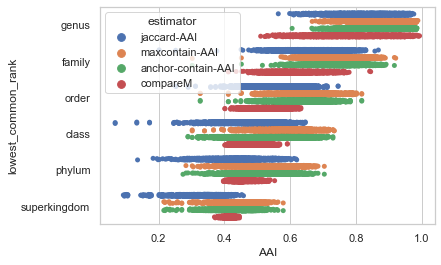

In [152]:
sns.stripplot(x="AAI", y="lowest_common_rank", data=allprot_melt, hue='estimator', dodge=True)

In [137]:
sns.color_palette("Blues").as_hex()

['#dbe9f6', '#bad6eb', '#89bedc', '#539ecd', '#2b7bba', '#0b559f']

In [139]:
list(sns.color_palette("Blues").as_hex())

['#dbe9f6', '#bad6eb', '#89bedc', '#539ecd', '#2b7bba', '#0b559f']

In [140]:
sns.color_palette().as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

In [135]:
list(sns.color_palette().as_hex())[3]


'#c44e52'

In [141]:
list(sns.color_palette().as_hex())[2]

'#55a868'

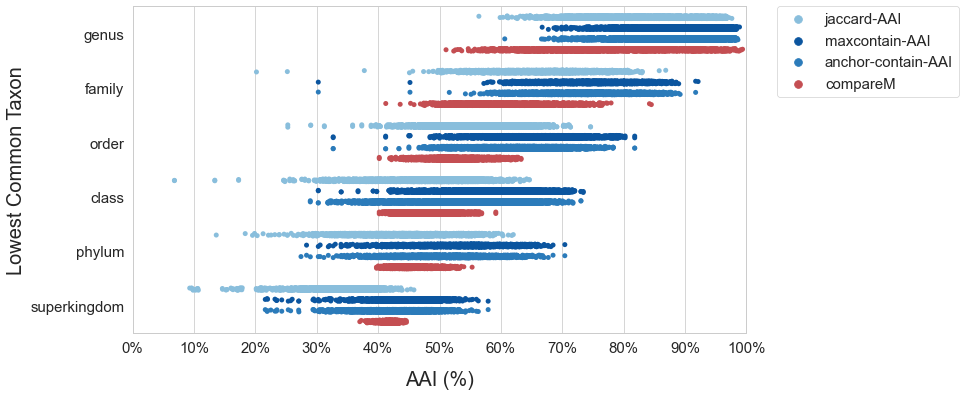

In [169]:
aai_colors = {"jaccard-AAI":"#89bedc", "maxcontain-AAI":"#0b559f", "anchor-contain-AAI":'#2b7bba', "compareM":"#c44e52"}

sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("whitegrid")
    #g=sns.violinplot(data=allprot_melt, y="lowest_common_rank", x="AAI", hue="estimator", order=rankorder, dodge=True,inner=None, color=".8")
    g=sns.stripplot(data=allprot_melt, y="lowest_common_rank", x="AAI", hue="estimator", order=rankorder, dodge=True, palette=aai_colors)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #g.legend_.remove()
    #x = plt.gca().axes.get_xlim()
    #median_width = 0.5
    #order = 3
    #for tick, text in zip(g.get_yticks(), g.get_yticklabels()):
    #    rank = text.get_text()
    #    median_val = allprot_melt.loc[allprot_melt["lowest_common_rank"] == rank].median()['AAI']
    #    g.plot([median_val, median_val],[tick-median_width/2, tick+median_width/2],lw=1.8, color='dimgray', zorder=order)
    #    order+=1

    # format x ticks as %
    plt.gcf().set_size_inches(11, 6)
    g.set(xlim=(0, 1))
    g.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    g.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    plt.xlabel("AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    #g.axis("off")
    #g.spines["right"].set_visible(False)
    #g.spines["top"].set_visible(False)
    #g.spines["left"].set_visible(False)
    #g.spines["bottom"].set_visible(False)
    fig = g.get_figure()
    fig.savefig("gtdb95-evolpaths.AAIcompare.strip.png",bbox_inches='tight')
    fig.savefig("gtdb95-evolpaths.AAIcompare.strip.pdf",bbox_inches='tight')

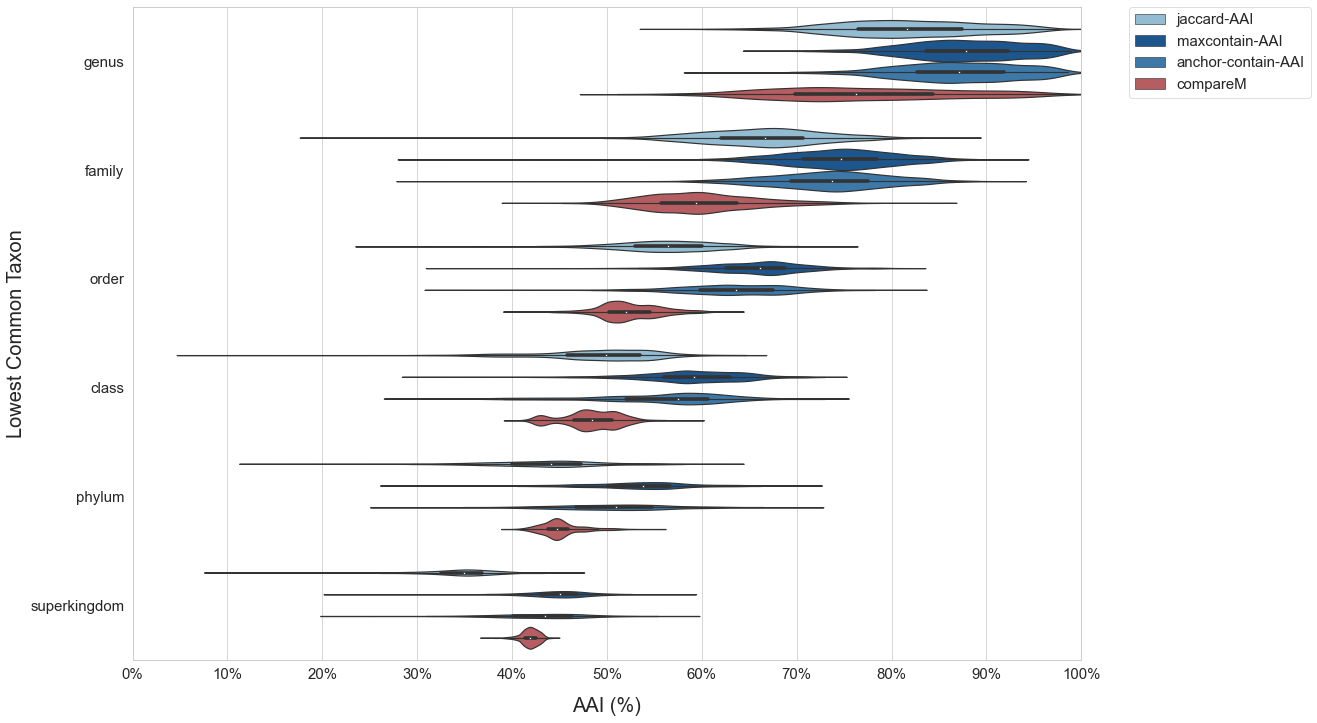

In [168]:
aai_colors = {"jaccard-AAI":"#89bedc", "maxcontain-AAI":"#0b559f", "anchor-contain-AAI":'#2b7bba', "compareM":"#c44e52"}

sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("whitegrid")
    #g=sns.violinplot(data=allprot_melt, y="lowest_common_rank", x="AAI", hue="estimator", order=rankorder, dodge=True,inner=None, color=".8")
    g=sns.violinplot(data=allprot_melt, y="lowest_common_rank", x="AAI", hue="estimator", order=rankorder, dodge=True, palette=aai_colors)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #g.legend_.remove()
    #x = plt.gca().axes.get_xlim()
    #median_width = 0.5
    #order = 3
    #for tick, text in zip(g.get_yticks(), g.get_yticklabels()):
    #    rank = text.get_text()
    #    median_val = allprot_melt.loc[allprot_melt["lowest_common_rank"] == rank].median()['AAI']
    #    g.plot([median_val, median_val],[tick-median_width/2, tick+median_width/2],lw=1.8, color='dimgray', zorder=order)
    #    order+=1

    # format x ticks as %
    plt.gcf().set_size_inches(17, 12)
    g.set(xlim=(0, 1))
    g.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    g.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    plt.xlabel("AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    #g.axis("off")
    #g.spines["right"].set_visible(False)
    #g.spines["top"].set_visible(False)
    #g.spines["left"].set_visible(False)
    #g.spines["bottom"].set_visible(False)
    fig = g.get_figure()
    fig.savefig("gtdb95-evolpaths.AAIcompare.violin.png",bbox_inches='tight')
    fig.savefig("gtdb95-evolpaths.AAIcompare.violin.pdf",bbox_inches='tight')